<a href="https://www.kaggle.com/code/ahmeterdemyenay/plotly-plots?scriptVersionId=188647194" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# INTRODUCTION

Plotly library: Plotly's Python graphing library makes interactive, publication-quality graphs online. 

Content:

<br>Content:
1. [Loading Data and Explanation of Features](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. Map Plots: https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
1. Data Visualization
    1. Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-beginners
    1. Bokeh 1: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    1. Bokeh 2: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-
    1. Rare Visualization: https://www.kaggle.com/kanncaa1/rare-visualization-tools
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)
1. Earthquake Animation: https://www.kaggle.com/kanncaa1/earthquake-animation-with-plotly

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['world-university-rankings']


<a id="1"></a> <br>       
# Loading Data and Explanation of Features

timesData includes 14 features that are:
- world_rank
- university_name
- country
- teaching
- international
- research
- citations
- income
- total_score
- num_students
- student_staff_ratio
- international_students
- female_male_ratio
- year

In [2]:
# Load data that we will use.
timesData = pd.read_csv("/kaggle/input/world-university-rankings/timesData.csv")

In [3]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


<a id="2"></a> <br>  
# Line Charts

Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities

Explanation:
- Creating traces
    - x = x axis
    - y = y axis
    - mode = type of plot like marker, line or line + markers
    - name = name of the plots
    - marker = marker is used with dictionary.
        - color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    - text = The hover text (hover is curser)
- data = is a list that we add traces into it
- layout = it is dictionary.
    - title = title of layout
    - x axis = it is dictionary
        - title = label of x axis
        - ticklen = length of x axis ticks
        - zeroline = showing zero line or not
- fig = it includes data and layout
- iplot() = plots the figure(fig) that is created by data and layout

In [5]:
# prepare data frame
df = timesData.iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="3"></a> <br>  
# Scatter Charts


Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years

In [6]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [7]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citations vs World Rank of Top 100 Universities (2014, 2015, 2016)',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="4"></a> <br>  
# Bar Charts

First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)

In [8]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [9]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]

# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Second Bar Charts Example: citations and teaching of top 3 universities in 2014 (style2)
Actually, if you change only the barmode from group to relative in previous example, you achieve what we did here. However, for diversity I use different syntaxes.

In [10]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'teaching',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'relative',
  'title': 'citations and teaching of top 3 universities in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Third Bar Charts Example: Horizontal bar charts. (style3) Citation vs income for universities

In [11]:
# prepare data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

/opt/conda/lib/python3.10/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<a id="5"></a> <br>  
# Pie Charts

Pie Charts Example: Students rate of top 7 universities in 2016

In [12]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.175,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>  
# Bubble Charts

Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016

In [13]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              7 non-null      object 
 1   university_name         7 non-null      object 
 2   country                 7 non-null      object 
 3   teaching                7 non-null      float64
 4   international           7 non-null      object 
 5   research                7 non-null      float64
 6   citations               7 non-null      float64
 7   income                  7 non-null      object 
 8   total_score             7 non-null      object 
 9   num_students            7 non-null      object 
 10  student_staff_ratio     7 non-null      float64
 11  international_students  7 non-null      object 
 12  female_male_ratio       6 non-null      object 
 13  year                    7 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memory usa

In [14]:
# Data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20, :]
num_students_size = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    go.Scatter(
        y=df2016.teaching,
        x=df2016.world_rank,
        mode='markers',
        marker=dict(
            color=international_color,
            size=num_students_size,
            showscale=True,
            colorbar=dict(title="International Percentage"),
        ),
        text=df2016.university_name
    )
]

layout = go.Layout(
    title='Teaching Scores vs World Rank of Top 20 Universities (2016)',
    xaxis=dict(title='World Rank'),
    yaxis=dict(title='Teaching Scores'),
    hovermode='closest',
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=0.5,
            y=-0.2,
            xanchor='center',
            yanchor='top',
            text='Bubble size represents the number of students',
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="7"></a> <br>  
# Histogram

Lets look at histogram of students-staff ratio in 2011 and 2012 years.

In [15]:
# Prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

# Create histogram trace for 2011
trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name="2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)')
)

# Create histogram trace for 2012
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name="2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)')
)

# Combine traces into data list
data = [trace1, trace2]

# Define layout
layout = go.Layout(
    barmode='overlay',
    title='Student-Staff Ratio in 2011 and 2012',
    xaxis=dict(title='Student-Staff Ratio'),
    yaxis=dict(title='Count')
)

# Create figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)

<a id="8"></a> <br>  
# Word Cloud

Lets look at which country is mentioned most in 2011.

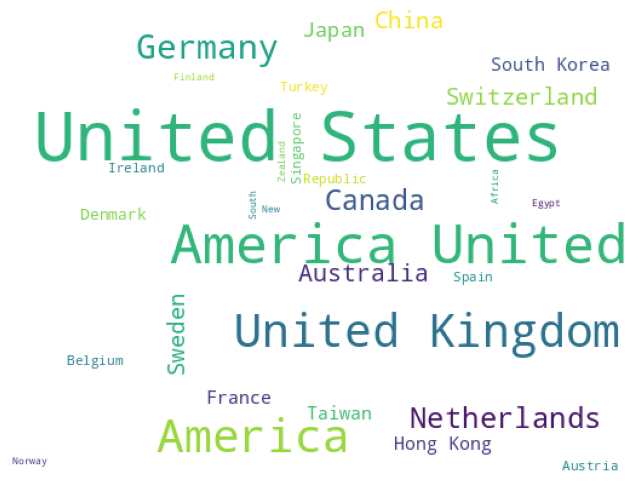

In [16]:
# Data preparation
x2011 = timesData.country[timesData.year == 2011]

# Create a figure of size 8x8 inches
plt.subplots(figsize=(8, 8))

# Generate a word cloud
wordcloud = WordCloud(
    background_color='white',
    width=512,
    height=384
).generate(" ".join(x2011))

# Display the word cloud using imshow
plt.imshow(wordcloud)
plt.axis('off')  # Hide the axis

# Save the word cloud image to a file
plt.savefig('graph.png')

# Show the word cloud
plt.show()

<a id="9"></a> <br>  
# Box Plots

Comparison of Total Score and Research Score of Universities in 2015

In [17]:
# Data preparation
x2015 = timesData[timesData.year == 2015]

# Creating a box plot for the total score of universities in 2015
trace0 = go.Box(
    y=x2015.total_score,
    name='Total Score of Universities in 2015',
    marker=dict(
        color='rgb(12, 12, 140)',
    )
)

# Creating a box plot for the research scores of universities in 2015
trace1 = go.Box(
    y=x2015.research,
    name='Research of Universities in 2015',
    marker=dict(
        color='rgb(12, 128, 128)',
    )
)

# Combine traces into data list
data = [trace0, trace1]

# Define layout for the plot
layout = go.Layout(
    title='Comparison of Total Score and Research Score of Universities in 2015',
    yaxis=dict(title='Score'),
    xaxis=dict(title='Categories')
)

# Create figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)

<a id="10"></a> <br>  
# Scatter Matrix Plots

In [18]:
import plotly.figure_factory as ff

# Prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:, ["research", "international", "total_score"]]
data2015["index"] = np.arange(1, len(data2015) + 1)

# Create scatter plot matrix
fig = ff.create_scatterplotmatrix(
    data2015,
    diag='box',
    index='index',
    colormap='Portland',
    colormap_type='cat',
    height=700,
    width=700
)

# Plot the figure
iplot(fig)

<a id="11"></a> <br>  
# Inset Plots

Inset Matrix = 2 plots are in one frame

In [19]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(32, 150, 8, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(250, 200, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="12"></a> <br>  
# 3D Scatter Plot with Colorscaling

In [20]:
# Create trace 1 that is a 3D scatter plot
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)'  # Set color to red
    )
)

# Combine trace into a data list
data = [trace1]

# Define layout for the plot
layout = go.Layout(
    title='3D Scatter Plot of World Rank, Research, and Citations',
    scene=dict(
        xaxis=dict(title='World Rank - x'),
        yaxis=dict(title='Research - y'),
        zaxis=dict(title='Citations - z')
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
)

# Create figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)

<a id="13"></a> <br>  
# Multiple Subplots

In [21]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)